In [72]:
import pandas as pd
import numpy as np

In [73]:
data = pd.read_csv('./data/filtered_data.csv')

In [74]:
len(data)

58863476

In [3]:
phishing_label = pd.read_csv('./data/phishing_label.csv')

In [4]:
phishing_address_set = set(phishing_label['address'])

### phishing 地址大小写转换

In [47]:
phising_lowercase_address_set = set(map(lambda x: x.lower(), phishing_address_set))

In [49]:
len(phising_lowercase_address_set)

2880

In [78]:
from_address_set = set(data['from'])

In [79]:
to_address_set = set(data['to'])

In [65]:
len(phising_lowercase_address_set.intersection(from_address_set.union(to_address_set)))

1992

In [77]:
phishing_data = pd.read_csv('./data/all_phishing_data.csv')

In [9]:
len(from_address_set.union(to_address_set))

28158908

In [10]:
from_counts = data['from'].value_counts()
to_counts = data['to'].value_counts()

In [11]:
tmp_df = pd.DataFrame(from_counts).reset_index()
tmp_df = tmp_df[(tmp_df['from'] > 4)]
from_high_freq_set = set(tmp_df['index'])

tmp_df = pd.DataFrame(to_counts).reset_index()
tmp_df = tmp_df[(tmp_df['to'] > 4)]
to_high_freq_set = set(tmp_df['index'])


In [12]:
#from to 均 < 1000 较为宽松的条件
high_freq_set = from_high_freq_set.union(to_high_freq_set)

In [13]:
len(high_freq_set)

2624386

In [53]:
len(phising_lowercase_address_set.intersection(high_freq_set))

1115

In [54]:
data

,blockNumber,transactionHash,from,to,value
0,2000002,0xe217b4f3b3566e39aaa98ac3c8119e943de114d44ff0...,0x147184ef469ce9bba3d08af16f0b6d31cac35ac8,0x695055f1ea55c36ec7e3bd43d1736511ac8dab61,110000000000000000000
1,2000004,0xc002e0675b51c9844fc029220d40892c254ab56372b2...,0xf05c1b271d12b7ecb3b37122730c085ec2c0b552,0x4fdf5371f7ffa04866f696882db659fe38f52559,49887512481999995000
2,2000004,0x52001b82c8104b88e91480063ba8294cc65302371789...,0x8975dbc1b8f25ec994815626d070899dda896511,0xb2e3732c0b0ec387962f76fa4f1bb9325089c5e0,214603330360000000000
3,2000006,0xe0f5d909272867f4c34f6f230ee45b2aeb59652affb0...,0x74e8013fc55e6a554717109c60294d014d2fa0a3,0xaf2a5e433f8eec5ba30c9fe2d9180674a825cccf,1500000000000000000
4,2000006,0xc12a861a58a5e2c9da880952dbebf1547dee41434e57...,0x74e8013fc55e6a554717109c60294d014d2fa0a3,0xaf2a5e433f8eec5ba30c9fe2d9180674a825cccf,1500000000000000000
...,...,...,...,...,...
59096631,6999999,0xa8c270fb0f44f16c6eabf24baa65d32dfdf1844bc2e4...,0x72d1bf82bf5d6c76ab13e943dcb520ef08b715ad,0x9bb84ad30254a5a4f850f1c1b93f423e7468d34d,464283150000000000
59096632,6999999,0x98a9c2cd82ebaeb6b19a51d3707f7056fd8c58eeb89c...,0x8efa9afc967bf26b6275a9815c4d0a512484adad,0x2f35bec5647fadb852427f7a48a5a46de4562ac8,120000000000000000
59096633,6999999,0x63fd63ba3337f7196ca826bcfb5591f7ba8c7d6156ed...,0x18c94b51d1b502c98c2f7afe677cb170ac014b4b,0x7bb87fa47ceb3ecf04df74e356e95c3f4ea73cbc,259620700000000000
59096634,6999999,0xbd4acf7db49325db3d7c4297ce4d3c25f920aa02cfa4...,0x11ff64dec15c9be6b410fcc997def81e9d002a8b,0xcc4281c5eaad96b30bc8af8028c8ab88cea28462,38307160000000000


In [80]:
data.to_csv('./data/filtered_address.csv',index=False, columns=['from', 'to'], header=False)

In [81]:
phishing_data.to_csv('format_sample.csv',index=False, columns=['from', 'to'], header=False)

# Run cpp file "get_address_freq.cpp"

##  观察phishing地址的统计分布

In [89]:
data

,blockNumber,from,to,value
0,1916996,0xebb6fb3a609e012e72eea175bdbe78d59ef1306d,0x7a91f8b230863f2d26cc3c75bcf6a26a7a8a2b0c,6566455166602152769
1,1916997,0xd23f1b07dbbf76a516679c21bfb64140abc8ef3c,0x7a91f8b230863f2d26cc3c75bcf6a26a7a8a2b0c,2914128337599425872
2,1917004,0xdaf0cf6232e422d563e627dd51debc69e5a10a80,0x825ee21b658e0f860466417d5dfbb5ce47441ca9,61274671530000000000
3,1917012,0xf35dfdbff481ac266bfc7dd7a8e55dc3940c0ae8,0xcf634d6e51291dd5afc9949d5ca7c48195aa1323,282997200000000000
4,1917013,0x0bea3a373c6a141ff524572af31f15d4d3d991d4,0xd098d8af7417a98a36c89e1fa2eca46f1efe3481,13920798009438000000
...,...,...,...,...
58863471,7006699,0xbed769e4fcc98cc1c9b168beb7aaa95a62eabbd6,0x439e718d10d14795c14b9fdac0877a63ad98c307,50000000000000000000
58863472,7006699,0x66fdbccefe70a47cfbf32a7165baa8a68c18e1b0,0xb2952877f08423d846f4482ba3fc2b1848bc6864,200000000000000000
58863473,7006700,0x37eaf9a198795424a14949b688da76d17aabd45d,0x431aaece8483c4fb50cb5af3e717f82fd8a9903f,10000000000000000
58863474,7006700,0xf7008434fcf84c51762bb232c2e0dbdd5a4fd2a7,0x65ce830e134d346a8cad666f84393edc769fca75,676974290000000000


In [107]:
len(set(phishing_address_count['address']).intersection(phising_lowercase_address_set).intersection(set(all_address_count['address'])))

164

In [90]:
phishing_address_count = pd.read_csv('./data/phishing_address_freq_count.csv')

In [88]:
all_address_count

,address,count
0,0xf49b7e6d2ed337cf5af4484df09537c32c5d74e0,1
1,0xc8ec6729a66a98c2d868dd460083b09faa0d61b8,1
2,0x9aa22fd8f3c6fb44659faffdfc3acf189e396941,1
3,0x52ff6195e3004b503103d41b9b3bc70c6feeb428,1
4,0x17ea0124e5e2ee2b851d1c6ee58d986d220ed794,1
...,...,...
4337298,0x26d6713a14ed3e6394577aadd5259963c7521c40,3
4337299,0xcdb54fdc38a29241e3b737393883f275c1a5a377,5
4337300,0x80bca849e05d49ed05d13c70a3175196259ad6b1,1
4337301,0xefa89f07eb359cd879dff50722cc9a5968227832,5


In [117]:
phishing_count_df = pd.merge(left=all_address_count, right=phishing_label, left_on='address',right_on='address', how='inner')

In [118]:
phishing_count_df

,address,count,tag,balance,txn_count
0,0x3331f67f5b2544fb0f2d7c90f7b8109d24bf6e7c,14,Fake_Phishing2729,0.00057818 Ether,16
1,0x57aa0ca8ddc99096d150f0dd1e1bd50616d809c8,3,Fake_Phishing2721,0 Ether,5
2,0x1df30d794ab40fb7d63e603df9eb8cc4fa4a8cb0,2,Fake_Phishing2708,0 Ether,6
3,0xed6b90c028310122af361ce84a4604afbed40910,1,Fake_Phishing1828,0.03196899 Ether,4
4,0x6fce6d2ceca868ac809d1e8d52e9fc3b8690118f,31,Fake_Phishing2707,0 Ether,99
...,...,...,...,...,...
1488,0xcb89576d5e1627f4a0c64c2bb4d51798e92e8b8f,2,Fake_Phishing694,0 Ether,2
1489,0xc4625787be3fccff6ac2971945806acc167c8cbd,10,Fake_Phishing691,0.00000691 Ether,11
1490,0x21cc4144c124742762f82120456fbf0b35249791,21,Fake_Phishing548,0 Ether,27
1491,0xc8ac47854a3fed2b444beb83f4c95ba092a3a735,2,Fake_Phishing536,0 Ether,2


In [110]:
#len(all_address_count)

27680169

In [122]:
len(phishing_count_df[(phishing_count_df['count'] > 10)])

586

In [123]:
#len(phishing_count_df[phishing_count_df['count'] > 10])

In [109]:
all_address_count = pd.read_csv('./data/filtered_address_freq_count.csv')

In [95]:
phishing_count_df.sort_values(by='count', ascending=True)

,address,count,tag,balance,txn_count
1092,0x85704b506e10b10d714ead28cde947baa58f0ea4,1,Fake_Phishing280,0.294426 Ether,1
551,0xb619a34abac80478ae6a93527fdeaeeb0e51e934,1,Fake_Phishing1137,0 Ether,0
428,0x9e12d932c429107608a8ad0d65c60021a371f9c1,1,Fake_Phishing1501,0.0000279 Ether,2
1279,0x4e04e00badce0458f926d8c2b02e09e2e5c2ed34,1,Fake_Phishing598,0.0098541 Ether,2
885,0x23f1909f7a65cba4d2a4a42ee1ba7d9772c3ba93,1,Fake_Phishing2563,0.4 Ether,1
...,...,...,...,...,...
643,0xf2bad87c0d0ea8bda69c722368df4f79d92ee6c9,1186,Fake_Phishing614,0 Ether,680
983,0x3cbd2e6143f057bd49ffb4c7058217a5900c35d3,1329,Fake_Phishing311,0 Ether,"1,587"
240,0xbfa82fbe0e66d8e2b7dcc16328db9ecd70533d13,1568,Fake_Phishing1968,0 Ether,909
858,0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed,1619,Fake_Phishing702,0 Ether,"1,619"


In [125]:
import matplotlib.pyplot as plt

In [127]:
phishing_address_ratio = []
for thres in range(1000):
    phishing_address_ratio.append(len(phishing_count_df[(phishing_count_df['count'] > thres)]) / len(all_address_count[all_address_count['count'] > thres]))
    print(phishing_address_ratio[-1], ',', len(all_address_count[all_address_count['count'] > thres]))

5.3937531956542606e-05 , 27680169
7.224752435950864e-05 , 19350144
9.381141371675549e-05 , 12706343
9.628509501304686e-05 , 11060902
0.00010145120261499591 , 9324680
0.00023899258465963268 , 3652833
0.0003567877197488001 , 2250638
0.00041339858952205193 , 1787621
0.00044897867285082914 , 1510094
0.00048283937009675857 , 1310995
0.0005066372943839342 , 1156646
0.0005300993091328677 , 1035655
0.0005615621911407949 , 934892
0.000586686441911002 , 852244
0.0006155724438995488 , 779762
0.0006261697198238376 , 718655
0.000637367791280087 , 665236
0.0006369375267748168 , 618585
0.0006467183810194224 , 576758
0.0006645170127461396 , 540242
0.0006887351349644581 , 506726
0.0007007149810345407 , 476656
0.0007141506390647074 , 449485
0.0007249890545483647 , 424834
0.0007365309392760099 , 401884
0.0007500163902183177 , 381325
0.0007647096173967297 , 362229
0.0007775418073785236 , 344676
0.0007919320400473941 , 328311
0.0008106003548770058 , 313348
0.0008306783873496689 , 299755
0.00085036088061142

0.0013741297178453645 , 10916
0.001383508577753182 , 10842
0.0013921113689095127 , 10775
0.0014009526478005044 , 10707
0.0014087152516904582 , 10648
0.0014158957900698508 , 10594
0.0014240956992309882 , 10533
0.0014332123065163387 , 10466
0.0014424463890758727 , 10399
0.0014506769825918763 , 10340
0.00145800933125972 , 10288
0.0014682850430696947 , 10216
0.0014752163650668766 , 10168
0.001486031305726174 , 10094
0.0014956625785222854 , 10029
0.0015034579532925728 , 9977
0.0015124016938898972 , 9918
0.0015192950470981465 , 9873
0.0015262515262515263 , 9828
0.001534526854219949 , 9775
0.0015432098765432098 , 9720
0.0015513496742165685 , 9669
0.0015607116845281449 , 9611
0.001464894841477451 , 9557
0.0014719798128482809 , 9511
0.0014799154334038055 , 9460
0.0014879370815176957 , 9409
0.0014962060489473123 , 9357
0.0015037593984962407 , 9310
0.0014031300593631947 , 9265
0.0014101312506779478 , 9219
0.0014170481796381077 , 9174
0.0014246575342465753 , 9125
0.0014317180616740088 , 9080
0.001

0.001537042729787888 , 3253
0.0015422578655151142 , 3242
0.0015494267121165168 , 3227
0.001554726368159204 , 3216
0.0015590894917368258 , 3207
0.0015669069257286117 , 3191
0.0015733165512901196 , 3178
0.001579778830963665 , 3165
0.0015837820715869496 , 3157
0.001589825119236884 , 3145
0.0015928639694170119 , 3139
0.001595405232929164 , 3134
0.001601024655779699 , 3123
0.0016061676839061998 , 3113
0.0016123831022250886 , 3101
0.0016181229773462784 , 3090
0.0016233766233766235 , 3080
0.0016297262059973925 , 3068
0.0016377333770062235 , 3053
0.0016425755584756898 , 3044
0.0016474464579901153 , 3035
0.0016550810989738498 , 3021
0.001659475605708596 , 3013
0.001667778519012675 , 2998
0.0016722408026755853 , 2990
0.0016772895001677288 , 2981
0.0016835016835016834 , 2970
0.0016891891891891893 , 2960
0.0016931933626820183 , 2953
0.0016989466530750934 , 2943
0.0017041581458759373 , 2934
0.0017117425539198905 , 2921
0.0017193947730398899 , 2908
0.0017265193370165745 , 2896
0.0017307026652821046 

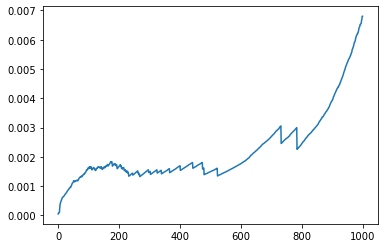

In [128]:
plt.plot(phishing_address_ratio)

## 过滤频次极低无法用于训练的数据样本

In [129]:
train_address_set = set(all_address_count[all_address_count['count'] >= 5]['address'])

In [130]:
len(train_address_set)

9324680

In [145]:
contract_list = pd.read_csv('./data/contract_address_list.csv')

In [146]:
len(contract_list)

16562632

In [150]:
len(train_address_set.intersection(set(contract_list['contract_address'])))

118286

In [131]:
#这里用 and 还是 or 可以尝试。 并且选取的阈值也有待商榷。
train_data = data[(data['from'].isin(train_address_set)) & (data['to'].isin(train_address_set))]

In [132]:
len(data)

58863476

In [133]:
len(train_data)

30956458

In [134]:
len(set(train_data['from']).union(set(train_data['to'])).intersection(phishing_address_set))

913

In [135]:
train_data = train_data[['blockNumber', 'from', 'to', 'value']]

In [136]:
train_data.to_csv('./data/train_data_ver2.0.csv', index=False)

In [137]:
train_label = pd.DataFrame(set(train_data['from']).union(set(train_data['to'])), columns=['address'])

In [139]:
train_label['label'] = train_label['address'].apply(lambda x: 1 if x in phising_lowercase_address_set else 0)

In [140]:
train_label.to_csv('./data/train_label_ver2.0.csv',index=False)

In [33]:
str(list('0'.zfill(18) + x).insert(-18, '.'))

NameError: name 'x' is not defined

In [ ]:
def wei2ether(x):
    x = list('0'.zfill(18) + x)
    x.insert(-18, '.')
    return np.double(''.join(x))
phishing_data['value'] = phishing_data['value'].apply(wei2ether)

In [ ]:
phishing_data['value'].median()

In [ ]:
tmp_df = phishing_count_df.sort_values(by='count', ascending=False)

In [ ]:
tmp_df.to_csv('phishing_sorted_count.csv', columns=['address', 'count'],index=False)

In [ ]:
phishing_data.head()

In [ ]:
phishing_count_df()

In [ ]:
tmp = pd.cut(phishing_count_df['count'], [0,20, 50, 100, 200,300, 400,1000,2000])



In [ ]:
tmp.value_counts().plot('bar')

In [ ]:
tmp.apply(lambda x: '(1000, inf]' if x == '(1000, 2000]' else x)

In [6]:
import pandas as pd
prev_train=pd.read_csv('./data/train_data_ver1.0.csv')


In [4]:
phishing_data=pd.read_csv('format_sample.csv')

In [9]:
586/184860

0.0031699664611057016